# Handson 06 - Python

## Modulação em Amplitude
    
Por ser a maioria dos sinais em banda base sinais de baixa frequência, estes não podem ser transmitidos efetivamente via radio (wireless). Modular sinais em banda base permite uma melhor distribuição das frequências sem que as transmissões interferam na outra. Para isso cada sinal é modulado em frequências de portadoras diferentes dentro de uma faixa de banda.

Se tratando de modulação, trataremos os seguinte termos:
- **$m(t)$** : Sinal em banda base (Sinal modulante)
- **$W$**    : Banda do sinal em banda base (Sinal modulante)
- **$s(t)$ **: Sinal em banda passante (Sinal modulado)
- **$B$    **: Banda do sinal em banda passante (Sinal modulado)
- **$c(t)$ **: Sinal portadora
- **$f_{c}$**: Frequência da portadora

Existem tres variáveis numa onda senoidal: amplitude, frequência (Instantânea) e fase. Um sinal mensagem pode ser usado pra modular qualquer um desses parâmetros permitindo que $s(t)$ porte a informação do transmissor para o receptor.


Amplitude $A(t)$ é proporcional a $m(t)$ $\Leftrightarrow $ Amplitude modulation -AM

Frequência é proporcional a $m(t)$      $\Leftrightarrow $ Frequency modulation -FM

Fase é proporcional a $m(t)$         $\Leftrightarrow $ Phase modulation -PM


Quando se trata de Modulação AM a amplitude é caracteriza a informação a ser enviada, sendo a frequência e a fase constante. A equação que descreve a onda AM-DSB (double-sideband) é dada por:
$$S_{DSB}(t)=A_{c}\cdot[1+m_{a}\cdot cos(2 \pi  f_{m} t)]\cdot cos(2\pi f_{c}t);     $$       

Em que o índice de modulação $m_{a}$ é dado por:
$$m_{a}=\frac{A_{m}}{A_{c}}$$

Podemos expandir a equação da seguinte forma:
$$S_{DSB}(t)=A_{c}\cdot cos(2\pi f_{c}t)+m(t)\cdot cos(2\pi f_{c}t)$$

Então:
$$S_{DSB}(t)= c(t)+S_{SC}(t)$$

Em que $c(t)$ é a portadora e $S_{SC}$ é a Modulação AM suprimida da portadora (suppressed-carrier).

Para visualizar em frequência o sinal, faremos a transformada de fourrier de $c(t)$ (definido em $F_{c}$) e do sinal $S_{SC}$:

$$m(t)cos(2\pi f_{c}t)\Leftrightarrow \frac{1}{2}[M(f+f_{c})+M(f-f_{c})]$$

Sendo $M(f+f_{c})$ deslocamento para direita e $M(f-f_{c})$ deslocamento para esquerda. Nota-se a formação de banda USB(up side band) externo a $f_{c}$ e LSB(Low side band) interna a $f_{c}$ com faixa de frequencia agora de $W=2f_{m}$. Caso a portadora tivesse uma frequência muito baixa tal que $f_{c}\leq W$, haveria a sobreposição dos espectros laterais um no outro tornando-se impossível recuperar a informação $m(t)$. Portanto é necessário que a frequência da portadora seja, no mínimo, $f_{c}\geq W$.

### AM-DSB 
#### Sinal no tempo e frequência
Para exemplificar, no script a seguir será feita a modulação de um sinal em AM e em seguida sua visualização no tempo e na frequência.

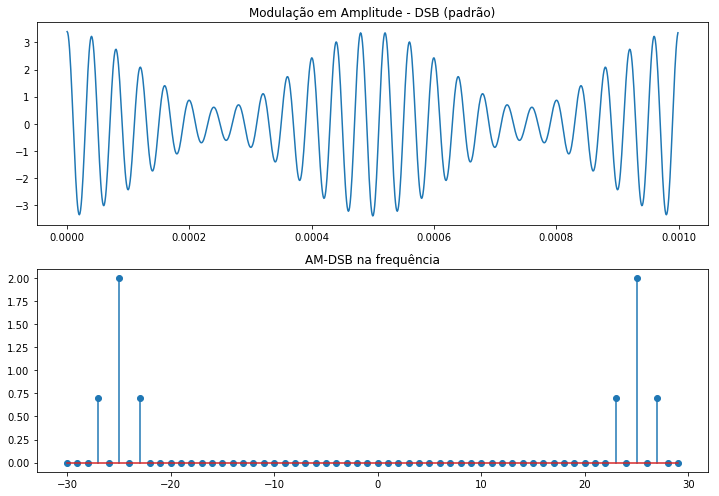

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

#parâmetros do sinal
Ac = 2                                                         # Amplitude da portadora
Mu = 0.7                                                       # Índice de modulação
fc = 25000                                                     # Frequência da portadora Hz
fm = 2000
N = 1000

t = np.arange(N)*1e-6
s = Ac*(1+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)

#s(t) = Ac[1+MuCos(2pifmt)]Cos(2pifct)
lfft = 30 #número de pontos da fft
k = np.arange(-lfft,lfft) #60 pontos

S_f = 2.0*np.abs((fftpack.fft(s)))/N
Ns = len(s)                                                 # Comprimento do vetor 'x'
Nk = len(k)                                                 # Comprimento do vetor 'k'
S_f_new = np.zeros(Nk)                              # Define vetor da frequencia como um vetor zeros de comprimento k

for i in range(Nk):
    kk = k[i]
    if kk>=0:
        S_f_new[i] = S_f[kk]
    else :
        S_f_new[i] = S_f[Ns+kk]



plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(t,s)
plt.title("Modulação em Amplitude - DSB (padrão)")

freq = fftpack.fftshift(fftpack.fftfreq(len(S_f),10**6))
plt.subplot(212)
plt.title("AM-DSB na frequência")
#plt.xlim([-50,50])
plt.stem(k,S_f_new)



plt.tight_layout()
plt.show()

Pode-se ver que houve a formção de $M(f+f_{c})$ e $M(f-f_{c})$ e também, adjacente a portadora encontram-se a parcela USB (externa) e LSB (interna) como mencionado acima.

#### Recepção AM-DSB (detecção de envoltória) 
O circuito demodulador AM-DSB é composto por tres elementos 
![Figura01](./handsOn6_matlab_figs/EasyDEADemoduladorAM.png)
(melhorar resistor, ajustar proporção, colocar descarregamento do capacitor)


Neste circuito primeiramente é retificado o sinal com um diodo. Em seguida com um paralelo de capacitor e resistor ocorre a carga e descarga do capacitor conforme o sinal de entrada é maior ou não do que a carga atual do capacitor. 

Montaremos então um script que fará a modulação AM-DSB e em seguida sua demodulação. Faremos um laço com as condições de carga e descarga do capacitor e nele acrescentaremos o termo tau ($\tau $) como a constante de descarga do capacitor - resistor.

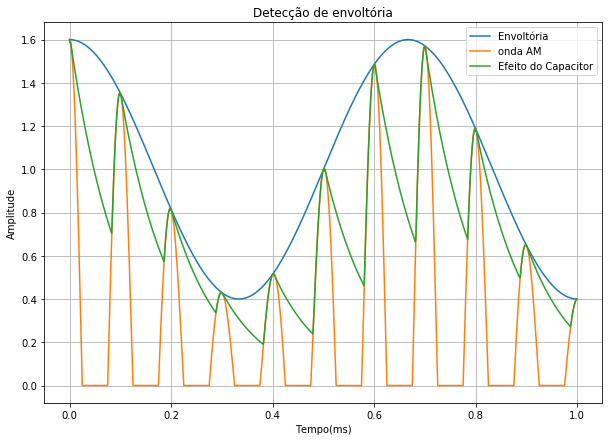

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

t = np.arange(1000)*1e-6                                        # Definição do vetor tempo
Ts=1e-6                                                         # Definiçao do periodo
fc = 10000                                                      # Frequencia da portadora.
fm = 1500                                                       # Frequencia do sinal
tau = 1e-4                                                      # Constante de tempo do detector de envelope.
Mu = 0.6                                                        # Indice de modulaçao.
Ac = 1.0
x_AM = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);                   # Onda Modulada AM-DSB

x_AM = x_AM*(x_AM>0)                                 #pegando só o semiciclo positivo do sinal (efeito do diodo)

x_env1 = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))  #envoltória ideal
x_env = np.zeros(len(x_AM))
Ns = len(x_AM)
out = -1

#cálculo da saída:
for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            #carga do capacitor
    else :
        out *= (1-Ts/tau)    #descarga do capacitor
    x_env[i] = out

plt.figure(1,[10,7])
plt.title("Detecção de envoltória")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")
envoltoria_ideal = plt.plot(t*1000,x_env1)
sinal_transmitido = plt.plot(t*1000,x_AM)
detector_de_saida = plt.plot(t*1000,x_env)
plt.grid()
plt.legend(["Envoltória","onda AM","Efeito do Capacitor"])
plt.show()

Esse tipo de modulação é recomandado em sistemas de difusão, em que há um grande numero de receptores em relação ao de transmissores, é mais econômico um transmissor caro de alta potência e receptores baratos, para que haja maior difusão.
### AM-DSB-SC 
#### Sinal no tempo e frequência
O sinal AM-DSB-SC consiste em suprimir a portadora da AM-DSB, deixando o sinal unicamente proporcional à mensagem, em outras palavras, quando não houver sinal $m(t)$ não haverá sinal enviado. 
Faremos neste script a modulação de um sinal AM-DSB-SC ($m(t)\cdot cos(2\pi f_{c}t)$). Será possível ver que haverá uma queda na frequencia da portadora $f_{c}$ como prevíamos. Para fazer a leitura de arquivos **.mat**, temos um módulo da SciPy, mostrado a seguir:

dict_keys(['env2b', 'msg', 'time', '__globals__', 'env2a', 'xam2', 'env1b', '__version__', 'm', 'env1a', 'xam1', 't', '__header__', 'carrier'])
(9000, 1)


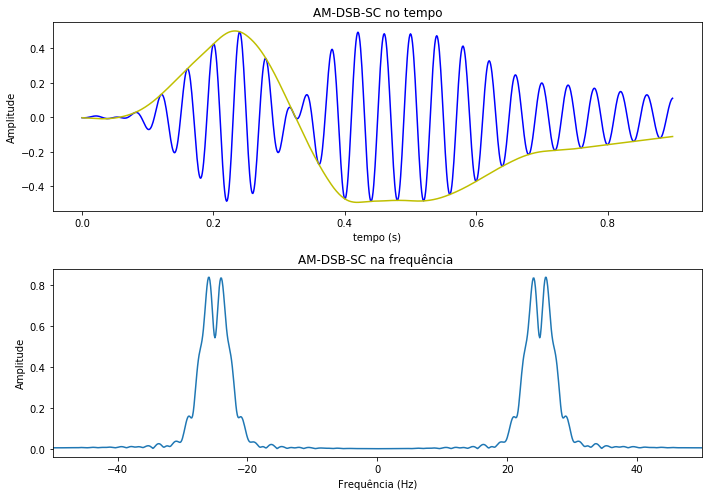

In [29]:
from scipy.io import loadmat
import numpy as np
from scipy import fftpack 
matlab_data = loadmat('handsOn6_matlab_codes/am_demo1.mat') #retorna um dicionário
#dicionários, em python, associam um valor a outro, ex.: 'variavel' : 25
#a string 'variavel' corresponde ao inteiro 25
#acessamos os valores(value) pelas keys, ou chaves
#nesse caso seria 'variavel', e 25 seu valor
print(matlab_data.keys())
t = matlab_data['t']
ts = t[1]-t[0]
fs = 1.0/ts
carrier = matlab_data['carrier']
msg = matlab_data['msg']
s = carrier*msg
lfft = len(s)*10
freq = np.arange(-fs/2,fs/2,fs/lfft)
M_fft = np.fft.fft(s,n=lfft,axis=0)/np.sqrt(lfft)
M_sig= fftpack.fftshift(M_fft)
import matplotlib.pyplot as plt
plt.figure(1,[10,7])
plt.subplot(211)
plt.title("AM-DSB-SC no tempo")
plt.ylabel("Amplitude")
plt.xlabel("tempo (s)")
plt.plot(t,s,'b',t,msg,'y')

plt.subplot(212)
plt.title("AM-DSB-SC na frequência ")
plt.ylabel("Amplitude")
plt.xlabel("Frequência (Hz)")
plt.plot(freq,np.abs(M_sig))
print(M_sig.shape)
plt.xlim([-50,50])
plt.tight_layout()
plt.show()

#### Recepção AM-DSB-SC (detecção coerente) 
Demodular um sinal AM-DSB-SC em termos de código é extremamente simples, visto que basta devolver a portadora ao sinal enviado multiplicando os dois e em seguida um filtro passa-baixa que teremos o sinal $m(t)$.

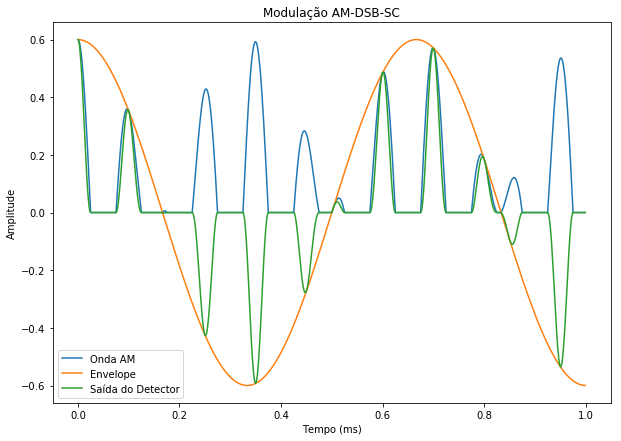

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

Ts = 1e-6
t = np.arange(1000)*Ts
fc = 10000                                                  # Frequencia da portadora.
fm = 1500                                                   # Frequencia do sinal
tau = 3e-5                                                  # Constante de tempo do detector de envelope.
Mu = 0.6                                                    # Indice de modulaçao.
x_AM = Mu*np.cos(2*np.pi*fm*t)*np.cos(2*np.pi*fc*t);                   # Onda Modulada AM-DSB-SC
x_env1 = Mu*np.cos(2*np.pi*fm*t) #envelope ideal
x_AM = x_AM*(x_AM>0)
x_env= np.zeros(len(x_AM))
#cálculo da saída
x_env = x_AM*np.cos(2*np.pi*fc*t)

plt.figure(1,[10,7])
sinal_AM = plt.plot(t*1000,x_AM)
envelope_ideal = plt.plot(1000*t,x_env1)
detector = plt.plot(t*1000,x_env)
plt.legend(["Onda AM","Envelope","Saída do Detector"])
plt.xlabel("Tempo (ms)")
plt.ylabel("Amplitude")
plt.title("Modulação AM-DSB-SC")
plt.show()

Porém em termos práticos há um custo muito elevado de se gerar um sinal da portadora em fase com o sinal recebido, não sendo apropriado para sistemas de difusão e sim pra transmissão ponto a ponto (mesmo numero de transmissores e receptores). 

### AM-SSB  
#### Sinal no tempo e frequência 

Na modulação AM formam-se duas bandas laterais, como já comentado anteriormente, que possuem a informação completa do sinal $m(t)$. Em consequência, para um sinal em banda base, a modulação AM-DSB requer o dobro de largura de banda necessário para a transmissão. Para melhorar a eficiência espectral de banda, bem como a de potência de transmissão, basta transmitir uma delas e filtrando a outra, resultando num novo tipo de transmissão AM-SSB. Além disso, podemos remover a portadora do sinal, resultando na AM-DSB-SC. A demodulação do sinal AM-SSB-SC é exatamente a mesma de um sinal AM-DSB-SC. A grande vantagem da AM-SSB-SC está na economia de até 83% da potência de transmissão, embora sejam necessários osciladores tão precisos quanto os da AM-DSB-SC.

No script abaixo, é exemplificado o processo de modulação e demodulação da AM-SSB. Inicialmente modula-se a onda AM em DSB-SC e em seguida é feita a filtragem de frequências superiores (LSB) ou inferiores (USB) da onda DSB, formando AM-SSB.

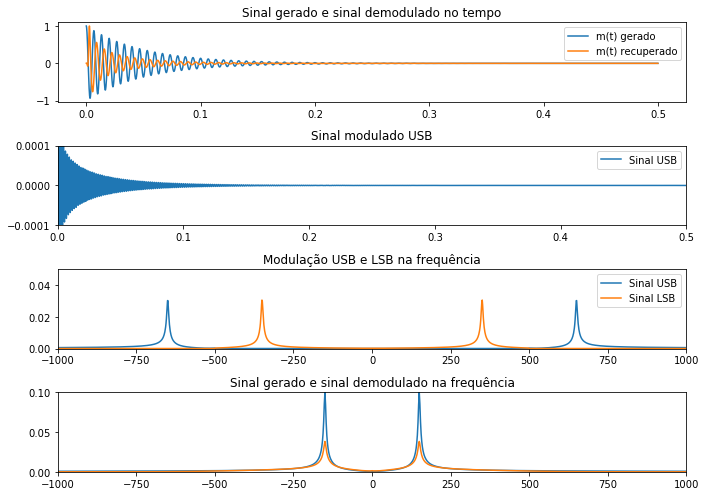

In [52]:
Ts=1e-4                                                    # Período de amostragem
fs=1/Ts                                                    # Frequencia de amostragem
t = np.arange(5e3)*Ts                                            # Definição do vetor tempo
fc = 500                                                   # Frequencia da portadora.
fm = 150                                                   # Frequencia do sinal
Am=1.0                                                       # Amplitude do sinal senoidal
Ac=1.0                                                       # Amplitude da portadora
Mu = Am/Ac                                                 # Indice de modulaçao.
carrier = Ac*np.cos(2*np.pi*fc*t)                                # Sinal portadora
m_t = Am*np.cos(2*np.pi*fm*t)*np.exp(-t*20)                        # Sinal mensagem
lmt = len(m_t)                                          # Comprimento do vetor mensagem
M_t = 2.0*np.abs(fftpack.fftshift(fftpack.fft(m_t,lmt)))/lmt          # Sinal na frequência
freq_m = np.arange(-fs/2,fs/2,fs/lmt)                  # Eixo da frequência para M_t

# Modulação SSB
# Modulação DSB-SC
x_AM = m_t*carrier                                        # Onda Modulada DSB-SC no tempo
lfft = len(x_AM)                                        # Comprimento do sinal DSB-SC
lfft = int(2**np.ceil(np.log2(lfft)))                                 # Comprimento do sinal DSB-SC potência de dois ex(1001 --> 1024)
X_AM = 2.0*np.abs(fftpack.fftshift(fftpack.fft(x_AM,lfft)))/lfft #Onda Modulada AM-DSB-SC na Frequência
freq = np.arange(-fs/2,fs/2,fs/lfft)                    # Eixo da frequência 
L_lsb = int(np.floor(fc*Ts*lfft))                       # Local na frequência que se encontra a LSB.

#filtragem da LSB
Filt_LSB = np.ones(lfft)                                    #Vetor filtro LSB (degrau) na frequencia 
Filt_LSB[lfft//2-L_lsb:lfft//2+L_lsb] = np.zeros(2*L_lsb)   # Definindo zeros na LSB
X_SSB_USB = X_AM*Filt_LSB                                 # Filtrando a frequência LSB

#filtragem da USB
Filt_USB = np.zeros(lfft)                                    #Vetor filtro USB na frequencia  
Filt_USB[lfft//2-L_lsb:lfft//2+L_lsb] = np.ones(2*L_lsb)   # DOnde tinha 1 agora tem 0
X_SSB_LSB = X_AM*Filt_USB                                 # Filtrando a frequência USB

#filtragem da USB
## Visualização SSB no tempo
# USB tempo
s_ssb_USB = np.real(fftpack.ifft(fftpack.fftshift(X_SSB_USB)))        # Inversa de fourrier
s_ssb_USB = s_ssb_USB[:lmt]                      # Ajustando o comprimento do vetor

# LSB tempo
s_ssb_LSB =  np.real(fftpack.ifft(fftpack.fftshift(X_SSB_LSB)))     # Inversa de fourrier
s_ssb_LSB = s_ssb_LSB[:lmt]                  # Ajustando o comprimento do vetor

# Demodulação
# Demodulação SSB-USB
from scipy import signal

s_dem_USB= s_ssb_USB*carrier*2                            # Multiplicação com a portadora em fase
B_m=1000                                                   # Banda para filtragem 
h=signal.firwin(50,B_m*Ts)                                  # Janelamento Hamming da banda
s_rec_USB=signal.lfilter(h,1e-4,s_dem_USB)                         # Sinal filtrado
#o que a filter faz?
lfft=len(s_rec_USB)                                     # Comprimento do sinal recuperado
lfft=int(2**np.ceil(np.log2(lfft)))                                    # Transformando para uma potencia de 2
SSB_freq_USB = fftpack.fftshift(fftpack.fft(s_rec_USB,lfft)/lfft)          # Sinal recuperado na frequencia
s_rec_USB = (max(m_t)/max(s_rec_USB))*s_rec_USB            # Amplificando o sinal

# Demodulação SSB-LSB
s_dem_LSB= s_ssb_LSB*carrier*2;                            # Multiplicação com a portadora em fase
B_m=1000                                                   # Banda para filtragem 
h=signal.firwin(50,B_m*Ts)                              # Janelamento Hamming da banda
s_rec_LSB =signal.lfilter(h,1e-4,s_dem_LSB)                         # Sinal filtrado

lfft=len(s_rec_LSB)                                     # Comprimento do sinal recuperado
lfft=int(2**np.ceil(np.log2(lfft)))                                    # Transformando para uma potencia de 2
SSB_freq_LSB = fftpack.fftshift(fftpack.fft(s_rec_LSB,lfft)/lfft)          # Sinal recuperado na frequencia
s_rec_LSB = (max(m_t)/max(s_rec_LSB))*s_rec_LSB            # Amplificando o sinal


plt.figure(1,[10,7])
plt.subplot(411)
plt.title("Sinal gerado e sinal demodulado no tempo")
plt.plot(t,m_t,t,s_rec_USB)
#plt.xlim([0.0,0.1])
#plt.ylim([-2,2])
plt.legend(["m(t) gerado","m(t) recuperado"])

plt.subplot(412)
plt.title("Sinal modulado USB")
plt.plot(t,s_ssb_USB)
plt.legend(["Sinal USB"])
plt.ylim([-1e-4,1e-4])
plt.xlim([0,0.5])

plt.subplot(413)
plt.title("Modulação USB e LSB na frequência")
plt.plot(freq,(X_SSB_USB),freq,(X_SSB_LSB)) #normalização feita no meio do código
plt.xlim([-1e3,1e3])
plt.ylim([0.0,0.05])
plt.legend(["Sinal USB","Sinal LSB"])

plt.subplot(414)
plt.title("Sinal gerado e sinal demodulado na frequência")
plt.plot(freq_m,M_t,freq,2.0*np.abs(SSB_freq_USB)) #divisão por len(...) feita no código
plt.xlim([-1e3,1e3])
plt.ylim([0.0,0.1])


plt.tight_layout()
plt.show()

### QAM 
#### Sinal no tempo e frequência:
Gerar uma onda AM-DSB-SC torna-se complicado a medida que necessita-se de filtros (passa baixa ou passa alta) de extrema precisão para que este elimine a frequência, por exemplo, LSB totalmente sem prejudicar na frequência USB. Por isso o uso de modulação em amplitude em quadratura (QAM) torna-se uma solução viável, sendo gerada com exatidão sem exigência de filtros extremamente precisos.

/home/joaomarcos/anaconda3/lib/python3.4/site-packages/scipy/fftpack/basic.py:153: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  z = zeros(s,x.dtype.char)


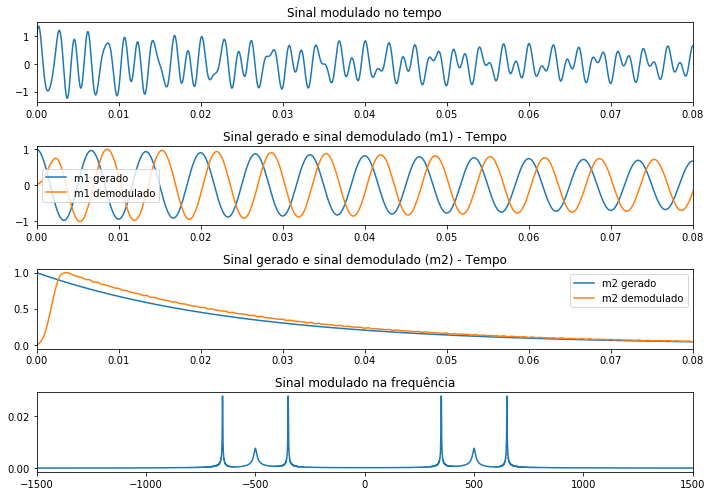

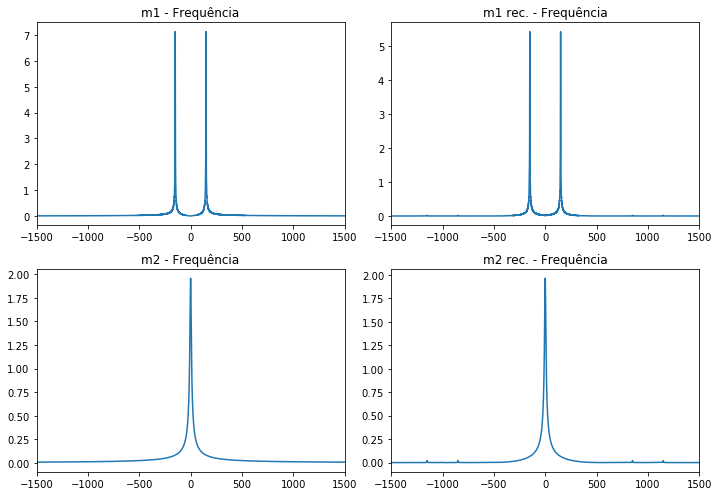

In [41]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.fftpack as ff
from scipy import signal
ts = 1e-4
fs = 1/ts
t = np.arange(0,5000,1)*ts
fc = 500
fm = 150                                                   # Frequencia do sinal
Am=1                                                     # Amplitude do sinal senoidal
Ac=1                                                      # Amplitude da portadora
Mu = Am/Ac
carrierc = Ac*np.cos(2*np.pi*fc*t)                               # Sinal portadora cosseno
carriers = Ac*np.sin(2*np.pi*fc*t)                               # Sinal portadora seno
m1_t = Am*np.cos(2*np.pi*fm*t)*np.exp(-t*5)                        # Sinal mensagem
m2_t = Am*np.exp(-t*40)                                       # Sinal mensagem
B_m=150                                                    # Banda para filtragem 
from spectrum.window import Window #módulo para gerar a janela hamming
h = Window(40, name= 'hamming')

lfft = len(t)       # FFT com o mesmo comprimento do sinal (t , m1_t e m2_t)
lfft = 2**np.ceil(np.log2(lfft)+1)
freqm = np.arange(-fs/2,fs/2,fs/lfft)
M1 = ff.fftshift(ff.fft(m1_t,lfft)/np.sqrt(lfft))                     # Sinal m1_t na frequência
M2 = ff.fftshift(ff.fft(m2_t,lfft)/np.sqrt(lfft))                      # Sinal m2_t na frequência

# Modulação QAM
# Modulação - Soma de duas DSB-SC ortogonais
x_qam = (m1_t)*(carrierc)+(m2_t)*(carriers)              # Sinal QAM no tempo
# Sinal na frequência
X_QAM=ff.fftshift(ff.fft(x_qam,lfft,axis=0)/lfft)      #Sinal QAM na frequência
# Demodulação
# Separando os sinais
m1_dem = x_qam*np.cos(2*np.pi*fc*t)*2                  # Demodulando m1_t
m2_dem = x_qam*np.sin(2*np.pi*fc*t)*2                  # Demodulando m2_t

M1_dem = ff.fftshift(ff.fft(m1_dem,lfft)/np.sqrt(lfft))        # m1_t na frequência com portadora
M2_dem = ff.fftshift(ff.fft(m2_dem,lfft)/np.sqrt(lfft))       #m2_t na frequência com portadora

# Filtro passa-baixas com hamming
#geração do filtro
a = 1 #numerador
b = signal.firwin(40, cutoff=B_m*ts, window='hamming') #denominador
m1_rec=signal.lfilter(b,a,m1_dem)         # Filtrando m1_dem em Hamming, a ordem é b,a mesmo
M1_rec=ff.fftshift(ff.fft(m1_rec,lfft)/np.sqrt(lfft))    # Calculando o sinal recebido m1_rec na frequência
m2_rec=signal.lfilter(b,a,m2_dem)         # Filtrando m2_dem em Hamming
M2_rec=ff.fftshift(ff.fft(m2_rec,lfft)/np.sqrt(lfft))# Calculando o sinal recebido m2_rec na frequência
m1_rec = (max(m1_t)/max(m1_rec))*m1_rec   # Amplificando o sinal m1_rec
m2_rec = (max(m1_t)/max(m2_rec))*m2_rec   # Amplificando o sinal m2_rec

#Plotagem
plt.figure(1,[10,7])
plt.subplot(411)
plt.title("Sinal modulado no tempo")
plt.plot(t,x_qam)
plt.xlim([0,0.08])

plt.subplot(412)
plt.title("Sinal gerado e sinal demodulado (m1) - Tempo")
plt.plot(t,m1_t,t,m1_rec)
plt.legend(["m1 gerado","m1 demodulado"])
plt.xlim([0,0.08])

plt.subplot(413)
plt.title("Sinal gerado e sinal demodulado (m2) - Tempo")
plt.plot(t,m2_t,t,m2_rec)
plt.legend(["m2 gerado","m2 demodulado"])
plt.xlim([0,0.08])

plt.subplot(414)
plt.title("Sinal modulado na frequência")
plt.plot(freqm,np.abs(X_QAM))
plt.xlim([-1500,1500])

plt.tight_layout()
plt.show()

plt.figure(2,[10,7])
plt.subplot(221)
plt.title("m1 - Frequência")
plt.plot(freqm,np.abs(M1))
plt.xlim([-1500,1500])

plt.subplot(222)
plt.title("m1 rec. - Frequência")
plt.plot(freqm,np.abs(M1_rec))
plt.xlim([-1500,1500])

plt.subplot(223)
plt.title("m2 - Frequência")
plt.plot(freqm,np.abs(M2))
plt.xlim([-1500,1500])

plt.subplot(224)
plt.title("m2 rec. - Frequência")
plt.plot(freqm,np.abs(M2_rec))
plt.xlim([-1500,1500])

plt.tight_layout()
plt.show()

## Modulação em frequência
Sinais FM variam sua frequência instantânea linearmente com o sinal $m(t)$ de froma que:

$$ f_{i}(t)=f_{c}+K_{f}m(t)$$

Onde $k_{f} $ é a sensibilidade de frequência do sinal e $f_{i}(t)$ é a frequência instantânea. Logo, podemos expressar uma onda FM da seguinte forma:

$$ S_{FM}(t) = A_{c}\cdot cos[\omega_{c}\cdot t +2\pi k_{f} \int_{0}^{t}m(\tau)\cdot d\tau ]$$

Sendo a amplitude constante, podemos calcular a potência do sinal como:

$$P_{med}= \frac{A^2}{2} $$

Em FM, nenhuma das propriedades da transformada de Fourrier podem ser aplicadas. Para determinar a banda de frequência a partir da equação de frequência instantânea definiremos: 

$$ f_{i}(t)=f_{c}+\Delta f\cdot cos(2\pi f_{m}t)$$

Sendo $\Delta f = K_{f}A_{m}$ o desvio de frequência.

As vantagens de usar FM tornam-se visível quanto a melhor descriminação de ruido devido a sua amplitude constante (ruido menos prejudicial) alem de que como é modulado em altas frequências (veremos o porquê adiante), é necessário dimensões menores de antenas. Em contrapartida a modulação FM requer maior largura de banda em relação a modulação AM além de uma maior complexidade no receptor e no emissor.

A informação contida em sinais FM reside na frequência instantânea deste de forma que:


<img src = "./handsOn6_matlab_figs/s_t.png " width="700" height="200">

Sendo 
$$V(t)=\frac{dS(t)}{dt}$$
Desenvolvendo a equação acima temos que:

$$ V(t)= A_{c}[2 \pi f_{c} + 2 \pi k_{f} m(t) ] \cdot sen[2 \pi f_{c} t+ 2 \pi k_{f} \int_{0}^{t}m(\tau)d\tau]    $$
sendo:
$$ V_{AM}(t)=  A_{c}[2 \pi f_{c} + 2 \pi k_{f} m(t) ]  $$
$$ V_{FM}(t)=  sen[2 \pi f_{c} t+ 2 \pi k_{f} \int_{0}^{t}m(\tau)d\tau] $$


E então, com um circuito diferenciador, transformamos nosso sinal FM em um sinal AM, então podemos demodular o sinal de saida com o mesmo circuito de um AM-DSB recupera-se a mensagem $m(t)$.

Neste experimento faremos a demodulação com um diferenciador ideal. Para essa simulação de FM, faremos uso da função 'numpy.diff' que retorna a diferença entre os pontos adjacentes do vetor, análoga a derivada em tempo contínuo. Por exemplo, seja um sinal $x$ no tempo dado por:

In [42]:
import numpy as np
t = np.arange(0,10,1)
x = 5*t + 2
dx = np.diff(x)
print(dx)

[5 5 5 5 5 5 5 5 5]


Ao contrário do que se vê no matlab, o vetor resultante da derivada via 'np.diff' possui N-1 elementos. 

/home/joaomarcos/anaconda3/lib/python3.4/site-packages/scipy/fftpack/basic.py:153: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  z = zeros(s,x.dtype.char)


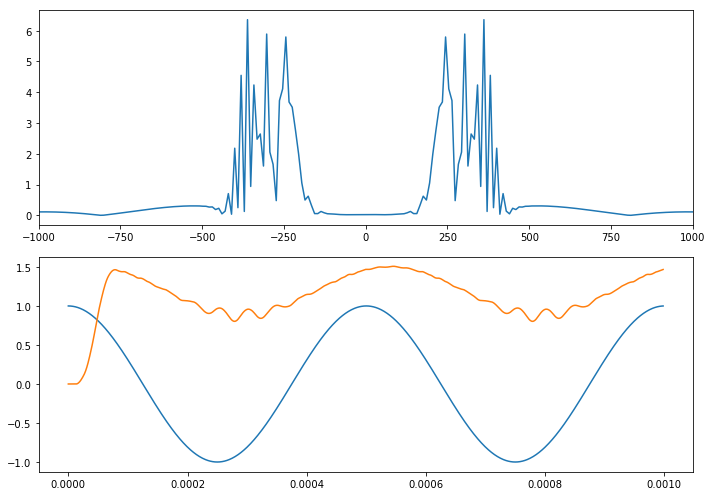

In [62]:
import numpy as np
import scipy.fftpack as ff
from scipy import signal
t = np.arange(0,999,1)*1e-6        # Definição do vetor tempo
ts=1e-4                                     # Definiçao do periodo de amostragem
lfft=len(t)                                  # Comprimento do vetor t
lfft=2**np.ceil(np.log2(lfft))                      # Transforma o comprimento em potência de 2
m_sig=np.cos(2*np.pi*2000*t)                        # Sinal no tempo
M_freq =ff.fftshift(ff.fft(m_sig,lfft,axis=0)/np.sqrt(lfft))       # Sinal na frequência
freqm=np.arange(-lfft/2,lfft/2,1)/(lfft*ts)              # Eixo da frequência
B_m=100                                          # largura de banda 100 lateral
b=signal.firwin(80,B_m*ts,window='hamming')                  # Janelamento Hamming
a=1
# Modulação
# Montando o sinal FM no tempo
kf=160*np.pi;                                    # Sensibilidade de frequencia 
m_intg=kf*ts*np.cumsum(m_sig)                     # Sinal mensagem com Kf
s_fm=np.cos(2*np.pi*30000*t+m_intg)                # Sinal portadora com m(t)
# Visualizando o sinal na freuqência
lfft=len(t);                                     # Comprimento da FFT
lfft=2**np.ceil(np.log2(lfft))                         # Lfft na potencia mais proxima de 2
S_fm=ff.fftshift(ff.fft(s_fm,lfft,axis=0)/np.sqrt(lfft))             # FFT do sinal
freqm=np.arange(-lfft/2,lfft/2,1)/(lfft*ts)             # Eixo da frequência

# Demodulação
s_fm_aux = np.concatenate(([s_fm[0]],s_fm),axis=0)
s_fmdem=np.diff(s_fm_aux)/(ts*kf)       # Diferenciador repetindo o primeiro elemento 
s_fmrec=np.select([s_fmdem>0],[s_fmdem])  # Parte positiva do sinal 
s_dec=signal.lfilter(b,a,s_fmrec)        # Filtro passa baixa em 200Hz de banda
import matplotlib.pyplot as plt

plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(freqm,np.abs(S_fm))
plt.xlim([-1000,1000])

plt.subplot(212)
plt.plot(t,m_sig,t,s_dec)

plt.tight_layout()
plt.show()

O resultado da demodulação FM mostra-se distorcido primeiramente com atrasos e em baixas amplitudes ocorre maior distorção. Isso ocorre porque quando o sinal da mensagem é negativo a frequência instantânea é baixa, causando mais distorções. Esse efeito é despresível quando se trata de frequências altas como na ordem de $10^{6}$Hz sendo assim possível a transmissão FM apenas em alta frequência.

### Transformada de Hilbert
O conceito de amplitude/fase/freqüência instantânea é fundamental para a comunicação de informações e aparece em muitas aplicações em processamento de sinais. Sabemos que um sinal da forma $$ x(t) = Am \cdot cos (\omega t + \phi)$$ Não carrega consigo nenhuma informação. Para que isso ocorra, é necessário que o sinal seja modulado. 

Seja x(t) um sinal modulado qualquer (Fm, Pm, Am ...):
$$x(t)= a(t) \cdot cos(\phi(t))$$
Entende-se $a(t)$ como amplitude instantânea do sinal e $\phi (t)$ como sua frequência. Podemos calcular também a frequência angular instantânea como:
$$ f(t) = \frac {1} {2 \pi } \frac {d \phi (t)}{dt} $$

Então seja um sinal real $x(t)$ qualquer, podemos extrair a informação $m(t)$ dele aplicando a transformada de Hilbert no sinal recebido tanto para modulação em ângulo quanto para a modulação em amplitude. Aplicando a transformada de Hilbert podemos calcular facilmente o sinal $m(t)$ no plano complexo.
![Figura01](./handsOn6_matlab_figs/Hilbert_Transform.png)

 Sendo 
 
 $$ Z(t)= Z_{r}(t)+j Z_{im}(t) = x(t) + j H[x(t)]$$
 
 Em que H[x(t)] representa a transformada de Hilbert em x(t).
 

- Para a informação em ângulo:

$$ \phi (t) = \angle Z(t) = arctan(\frac{Z_{im}(t)}{Z_{r}(t)})$$

- Para a informação em amplitude:

$$ a(t) = \left |Z(t)  \right | = \sqrt{Z_{im}^{2}(t)+Z_{r}^{2}(t)}$$
No script abaixo foi feito a simulação em AM-DSB usando a tranformada de Hilbert para decompor completamente um sinal $m(t)$.

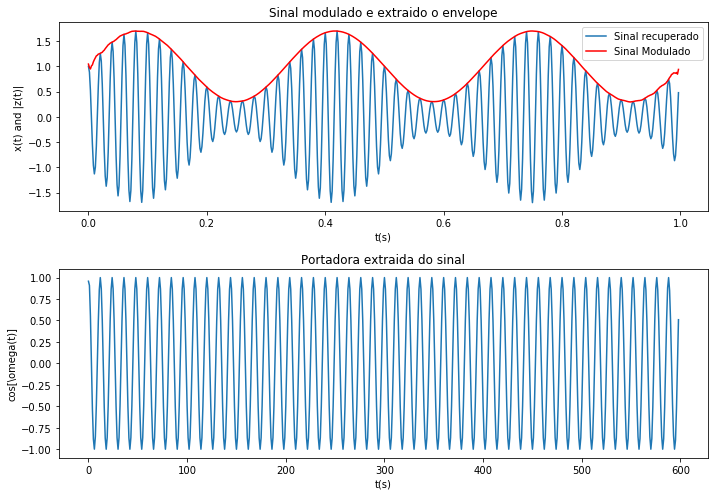

In [31]:
# Parâmetros da onda
import numpy as np
fs = 600                                          # Frequencia de amostragem 
t = np.arange(0,1-1/fs,1/fs)                                  # Eixo do tempo
m_t = 1+0.7 *np.sin(2*np.pi*3*t)                       # Sinal m(t)
c_t =np.cos(2*np.pi*50*t)                                # Sinal portadora
s_t = m_t * c_t                                  # Sinal Modulado em AM-DSB-SC

# Calcula a transformada de Hilbert 
from scipy.signal import hilbert
z = hilbert(s_t)                                   # Forma analítica (real + imaginario)
inst_amplitude = np.abs(z)                            # Amplitude instantânea
inst_phase = np.angle(z)                              # Fase instantânea
inst_freq = np.diff(inst_phase)/(2*np.pi)*fs             # Frequência instantânea                                            
regenerated_carrier = np.cos(inst_phase)              # Regenerando a portadora 

# Plotting
# Plota o sinal AM e detector de envelope
import matplotlib.pyplot as plt
plt.figure(1,[10,7])
plt.subplot(211) 
plt.plot(t,s_t)
plt.plot(t,inst_amplitude,'r')                           
plt.title('Sinal modulado e extraido o envelope')
plt.legend(['Sinal recuperado','Sinal Modulado'])
plt.xlabel('t(s)') 
plt.ylabel('x(t) and |z(t)|')
# Plota portadora recuperada
plt.subplot(212) 
plt.plot(np.cos(inst_phase))
plt.title('Portadora extraida do sinal') 
plt.xlabel('t(s)')
plt.ylabel('cos[\omega(t)]')

plt.tight_layout()
plt.show()


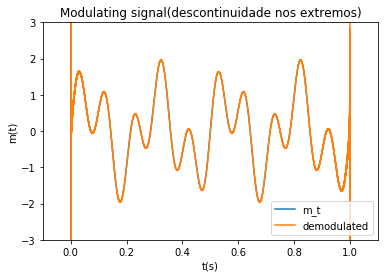

In [26]:
# Parâmetros da onda
import numpy as np
fc = 6000;                                              # Frequência da portadora
fm = 10;                                                # Frequência do sinal
Am = 1;                                                 # Amplitude do sinal 
Theta = np.pi/4;                                           # Fase do sinal
Beta = np.pi/5;                                            # Fase da portadora
Fs = 8*fc;                                              # Frequência de amostragem
duration = 0.5;                                         # Tempo final
t =  np.arange(0,1-1/Fs,1/Fs)                  # Eixo do tempo
 
m_t = Am*np.sin(2*np.pi*fm*t)+Am*np.sin(2*np.pi*0.4*fm*t)       # Sinal em banda base
kf=160*np.pi;                                              # Sensibilidade de frequencia 
m_intg=kf*np.cumsum(m_t)/Fs;                             # Somatório com Kf
x = np.cos(2*np.pi*fc*t +m_intg )                           # Sinal modulado
from scipy.signal import hilbert
# Hilbert
z= hilbert(x)                                        # Forma analítica (real + imaginario)
inst_phase = np.unwrap(np.angle(z));    # Fase instantânea com ajuste para variaçoes bruscas de angulo
p = np.polyfit(t,inst_phase,1);            # Ajustar linearmente a fase instantânea
# Reavaliar o termo de compensação usando os valores ajustados
estimated = np.polyval(p,t);                               
demodulated = inst_phase - estimated;
demodulated_aux = np.concatenate(([demodulated[0]],demodulated))
demodulated=np.diff(demodulated_aux)/(1/Fs*kf);

import matplotlib.pyplot as plt
plt.title('Modulating signal(descontinuidade nos extremos)')
plt.xlabel('t(s)')
plt.ylabel('m(t)')
plt.plot(t,m_t,t,demodulated)
plt.ylim([-3,3])
plt.xlim([-0.1,1.1])
plt.legend(['m_t','demodulated'])
plt.show()